<a href="https://colab.research.google.com/github/jojo778m/Anime_Face_Detection/blob/main/OpenCV%2BColab%E3%81%A7%E3%82%A2%E3%83%8B%E3%83%A1%E9%A1%94%E6%A4%9C%E5%87%BA%EF%BC%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 概要
Google ColabとOpenCVでアニメ顔の検出を行った．
検出には学習済みのCascade識別器を利用している．  
参照：  
https://algorithm.joho.info/programming/python/opencv-animeface-py/  
https://github.com/nagadomi/lbpcascade_animeface (カスケード識別器の入手元)

カスケード識別器で学習・識別に用いる特徴量は(OpenCVでは)以下の３種類である．  

1.   Haar-Like特徴量  
画面中の局所的な明暗差の組み合わせによって判別する
2.   LBP（Local Binary Pattern）特徴量  
画面中の局所的な輝度の分布の組み合わせによって判別する
3.   HOG（Histogram of Oriented Gradients）特徴量  
画面中の局所的な輝度の勾配方向の分布の組み合わせによって判別する

今回用いるカスケード識別器は2.LBP特徴量を使用している．自動運転の文脈における(ディープラーニングを使わない古典的な)歩行者検出では，HOG特徴量を用いるのが一般的．


In [1]:
%cd drive/MyDrive/卒論/AnimeFace

/content/drive/MyDrive/卒論/AnimeFace


In [2]:
!pwd
!ls

/content/drive/MyDrive/卒論/AnimeFace
image1.png  image2.png	image3.png  image4.jpg	lbpcascade_animeface.xml


カスケード識別器(lbpcascade_animeface.xml)は事前にgithubからcloneしてDriveにupした．  
その他入力する画像については自前で用意した．

In [3]:
import cv2
import matplotlib.pyplot as plt

参照元のコードをそのまま関数にしただけ．引数は顔検出したい画像のパス．

In [4]:
def AnimeFaceDetect(input):
  # 入力画像の読み込み
  img = cv2.imread(input)
  # カスケード型識別器の読み込み
  cascade = cv2.CascadeClassifier("lbpcascade_animeface.xml")
  # グレースケール変換
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # アニメ顔領域の探索
  face = cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=3, minSize=(30, 30))
  # 顔領域を赤色の矩形で囲む
  for (x, y, w, h) in face:
      cv2.rectangle(img, (x, y), (x + w, y+h), (0, 0, 200), 3)
  # 結果を出力
  cv2.imwrite("output.png", img)
  # 描画用にRGBに変換 
  show_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  plt.imshow(show_img)

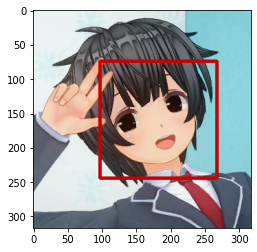

In [5]:
AnimeFaceDetect("image1.png")

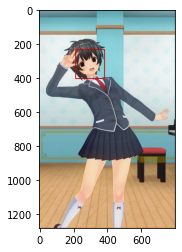

In [6]:
AnimeFaceDetect("image2.png")

マスクしてても大丈夫．

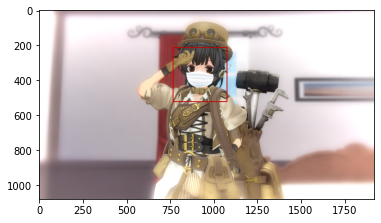

In [7]:
AnimeFaceDetect("image3.png")

複数人でも同時検出可能．  
画像は『ご注文はうさぎですか？』のアニメキービジュアル．

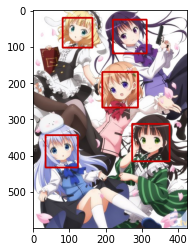

In [8]:
AnimeFaceDetect("image4.jpg")

```
© Koi・芳文社／ご注文はBLOOM製作委員会ですか？

このホームページに掲載されている一切の文書・図版・写真等を、
手段や形態を問わず複製、転載することを禁じます。
```


あ……(；・∀・)  